# This Notebook Analyzes Data found in the Moja Global Datasets for Kenya boundaries and Tana River County

In [1]:
import geopandas as gpd
import io, requests
import matplotlib.pyplot as plt

# 0. Functions to be Used

In [2]:
def get_df(link):    
    """
    Inputs a link to a json/geojson file 
    and returns the dataframe
    """
    try:
        return gpd.read_file(link)
    except Exception as e:
        print(e)
        print("Retrieving the Dataframe from url.")
        req = requests.get(link).content
        return gpd.read_file(io.StringIO(req.decode('utf-8')))


def plot_boundary(df, ax, color='none', edgecolor='black'):
    """
    Plots the administrative boundaries
    """
    df.plot(ax=ax, color=color, edgecolor=edgecolor)
    

    
def plot_feature(df, ax, column, edgecolor='black', cmap='tab20'):
    """
    Plots the features
    """
    df.plot(ax=ax, column=column, edgecolor=edgecolor, cmap=cmap, legend=True)
    
    
def clip_df(df_complete, df_n):
    """
    Clips the dataset to retain only the necessary data
    """
    return df_complete.clip(df_n)


def column_std(df):
    """
    Standardises column names
    """
    return df.columns.str.lower()

# 1. Administrative Boundaries

In [3]:
# Administrative boundaries of Kenya
Ken_bound=gpd.read_file('C:/Users/NDUBI/OneDrive/Desktop/MojaGlobal/KEN_AL2_Kenya.json')
Ken_bound_all=gpd.read_file('C:/Users/NDUBI/OneDrive/Desktop/MojaGlobal/KEN_ALL_states.json')
Ken_bound_tana=gpd.read_file('C:/Users/NDUBI/OneDrive/Desktop/MojaGlobal/KEN_AL4_Tana River.json')

In [4]:
Ken_bound.head()

,country,ISO3166_2,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,geometry
0,KEN,,Kenya,Kenya,Kenya,,administrative,2,Q114,en:Kenya,2019-03-22 23:19:02,"MULTIPOLYGON (((39.37506 -4.71945, 39.37096 -4..."


In [5]:
Ken_bound_all.head()

,country,ISO3166_2,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,geometry
0,KEN,KE-01,Baringo,,Baringo,,administrative,4,Q808201,,2019-02-26 10:33:27,"POLYGON ((35.52349 0.01318, 35.52753 0.00865, ..."
1,KEN,KE-02,Bomet,,Bomet,,administrative,4,Q891952,,2019-02-26 10:33:27,"POLYGON ((35.01294 -0.88264, 35.01410 -0.88704..."
2,KEN,KE-03,Bungoma,,Bungoma,,administrative,4,Q2928204,,2019-03-20 00:02:02,"POLYGON ((34.36246 0.77548, 34.36254 0.77540, ..."
3,KEN,KE-04,Busia,,Busia,,administrative,4,Q1017519,,2019-03-22 23:19:02,"MULTIPOLYGON (((33.91341 0.09734, 33.91376 0.0..."
4,KEN,KE-05,Elegeyo-Marakwet,,Elegeyo-Marakwet,,administrative,4,Q15216433,,2019-02-26 10:33:27,"POLYGON ((35.15229 1.19823, 35.15510 1.19164, ..."


In [6]:
Ken_bound_tana.head()

,country,ISO3166_2,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,geometry
0,KEN,KE-40,Tana River,,Tana River,,administrative,4,Q383150,,2019-02-26 10:33:27,"POLYGON ((38.41993 -0.07136, 38.44770 -0.11934..."


In [7]:
print(type(Ken_bound))
display(Ken_bound)

<class 'geopandas.geodataframe.GeoDataFrame'>


,country,ISO3166_2,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,geometry
0,KEN,,Kenya,Kenya,Kenya,,administrative,2,Q114,en:Kenya,2019-03-22 23:19:02,"MULTIPOLYGON (((39.37506 -4.71945, 39.37096 -4..."


In [9]:
print(type(Ken_bound))
display(Ken_bound)

<class 'geopandas.geodataframe.GeoDataFrame'>


,country,ISO3166_2,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,geometry
0,KEN,,Kenya,Kenya,Kenya,,administrative,2,Q114,en:Kenya,2019-03-22 23:19:02,"MULTIPOLYGON (((39.37506 -4.71945, 39.37096 -4..."


Kenya has 47 Counties

# Plotting Boundaries

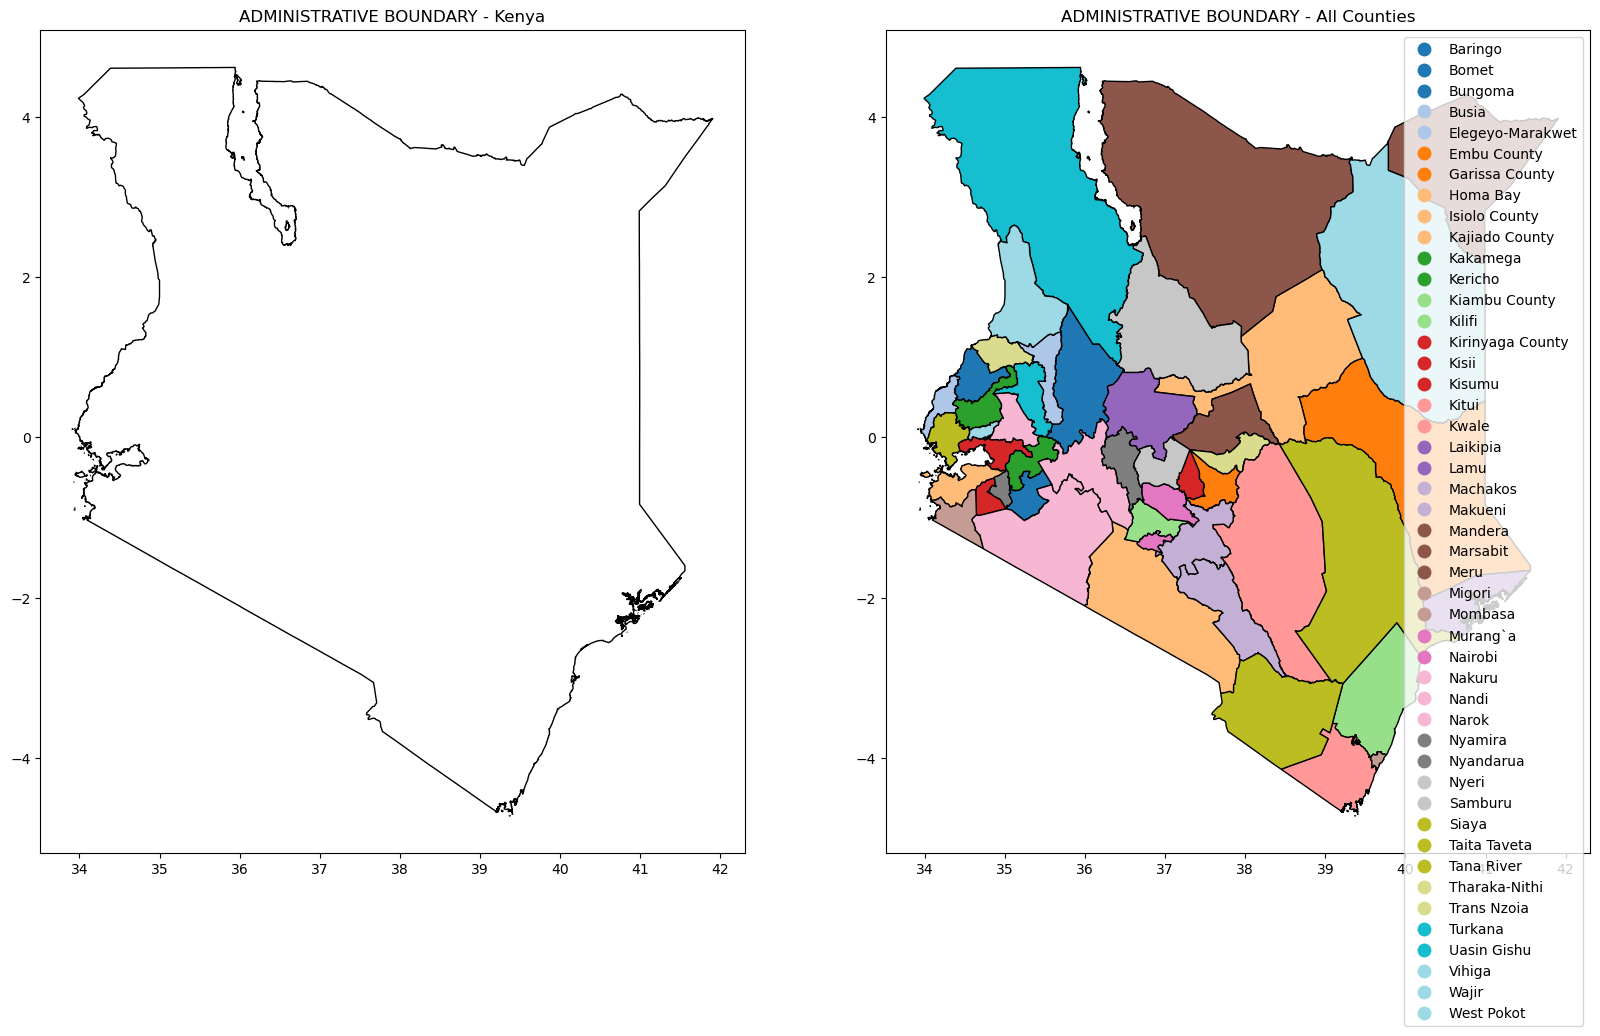

In [10]:
Ken_bound = Ken_bound[['name', 'geometry']]
Ken_bound_all = Ken_bound_all[['name', 'geometry']]
Ken_bound_tana = Ken_bound_tana[['name', 'geometry']]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 15))
ax1.set_title('ADMINISTRATIVE BOUNDARY - Kenya')
ax2.set_title('ADMINISTRATIVE BOUNDARY - All Counties')
plot_boundary(Ken_bound, ax1)
plot_feature(Ken_bound_all, ax2, 'name')

plt.show()

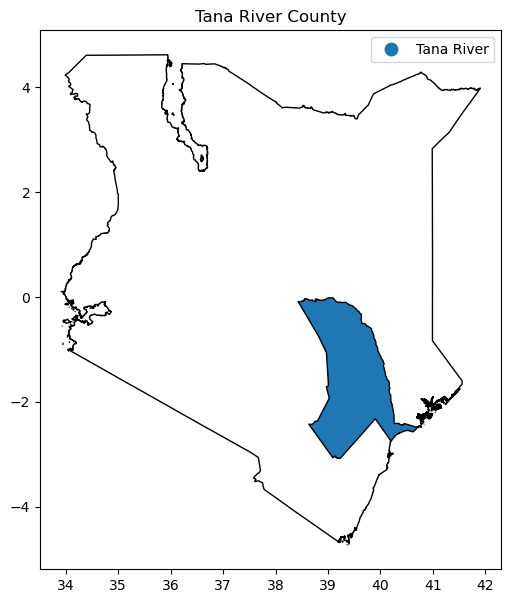

In [11]:
fig, ax = plt.subplots(1, figsize=(13, 7))
ax.set_title('Tana River County')
plot_boundary(Ken_bound, ax)
plot_feature(Ken_bound_tana, ax, 'name')

plt.show()

# Kenya's Ecological Zones

In [14]:
Ken_Gez=gpd.read_file('C:/Users/NDUBI/OneDrive/Desktop/MojaGlobal/KEN_AL2_Kenya_GEZ.json')
Ken_Gez.head()

,country,ISO3166_2,name,gez_name,gez_code,gez_abbrev,adminlevel,geometry
0,KEN,,Kenya,Tropical dry forest,13,TAwb,2,"MULTIPOLYGON (((34.76935 -0.29384, 34.76875 -0..."
1,KEN,,Kenya,Tropical moist forest,12,TAwa,2,"MULTIPOLYGON (((39.59500 -4.06283, 39.59465 -4..."
2,KEN,,Kenya,Tropical mountain system,16,TM,2,"MULTIPOLYGON (((38.45417 -3.34256, 38.41297 -3..."
3,KEN,,Kenya,Tropical rainforest,11,TAr,2,"MULTIPOLYGON (((39.22227 -4.66908, 39.22226 -4..."
4,KEN,,Kenya,Tropical shrubland,14,TBSh,2,"MULTIPOLYGON (((36.41257 -1.41796, 36.38317 -1..."


In [16]:
print(Ken_Gez["gez_name"])

0         Tropical dry forest
1       Tropical moist forest
2    Tropical mountain system
3         Tropical rainforest
4          Tropical shrubland
5                       Water
Name: gez_name, dtype: object


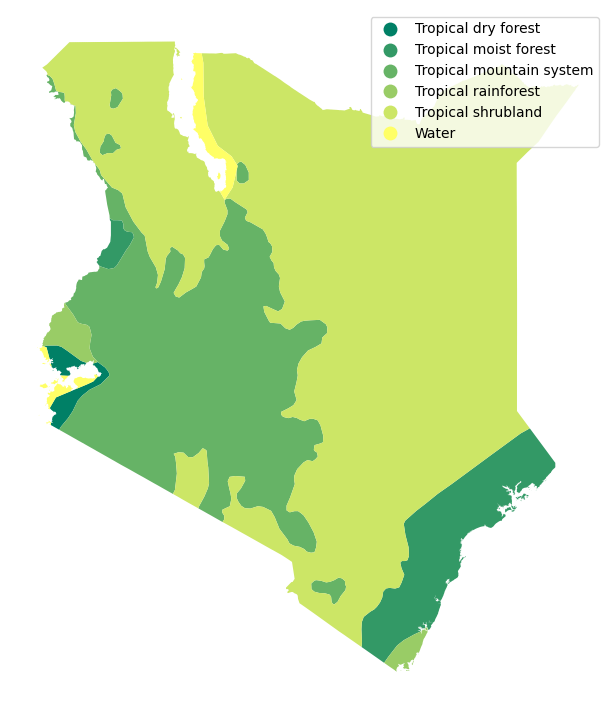

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(9, 9));
Ken_Gez.plot(ax=ax, column='gez_name', cmap = 'summer', legend=True)

plt.axis('off')
plt.show()

# Kenya's Soil World Resources

In [18]:
Ken_Soil=gpd.read_file('C:/Users/NDUBI/OneDrive/Desktop/Dbn-tech-Outreachy_Dennis-Ndubi_2023/KEN_AL2_Kenya_WSR.json')
Ken_Soil.head()

,country,ISO3166_2,name,SNAME,mg_code,IPCC,adminlevel,geometry
0,KEN,,Kenya,CL,29,Calcisol,2,"MULTIPOLYGON (((36.69084 2.83062, 36.69098 2.8..."
1,KEN,,Kenya,FR,26,Ferralsol,2,"MULTIPOLYGON (((34.11435 -0.21476, 34.11357 -0..."
2,KEN,,Kenya,LP,18,Leptosol,2,"POLYGON ((35.66344 4.61783, 35.66222 4.61778, ..."
3,KEN,,Kenya,LX,6,Lixisol,2,"MULTIPOLYGON (((39.37022 -4.65964, 39.36823 -4..."
4,KEN,,Kenya,NT,24,Nitisol,2,"MULTIPOLYGON (((39.20660 -4.67241, 39.20632 -4..."


In [19]:
print(Ken_Soil["SNAME"])

0     CL
1     FR
2     LP
3     LX
4     NT
5     VR
6    WAT
Name: SNAME, dtype: object


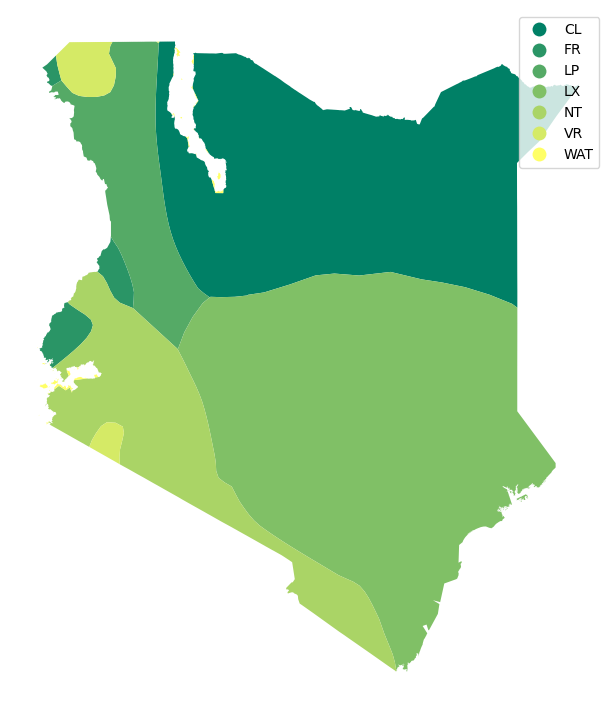

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(9, 9));
Ken_Soil.plot(ax=ax, column='SNAME', cmap = 'summer', legend=True)

plt.axis('off')
plt.show()